# Laboratório 8 - Lógica Fuzzy para Pêndulo Invertido

## Integrantes
| Nomes                             | R.A          |
|-----------------------------------|--------------|
| Andy Silva Barbosa                | 22.218.025-9 |
| Rafael Zacarias Palierini         | 22.218.030-9 |
| Rubens de Araujo Rodrigues Mendes | 22.218.009-3 |
| Vitor Acosta da Rosa              | 22.218.006-9 |


## Objetivos e proposta

Baseado no artigo "Fuzzy Control of a Real Time Inverted Pendulum System. Journal of Intelligent & Fuzzy Systems", implementar o conjunto de 49 regras totais para as tarefas de:

+ *Swing-up* do pêndulo: Contendo 7 regras.
+ Posição do carrinho: Contendo 7 regras.
+ Estabilização do pêndulo: Contendo as demais 35 regras.

Todas regras serão separadas em sistemas distintos de acordo com a estrutura de tópicos acima.


❗ **Todas regras são retiradas do artigo abaixo:**

+ Kizir, selçuk & Bingul, Z. & Oysu, Cuneyt. (2010). **Fuzzy Control of a Real Time Inverted Pendulum System. Journal of Intelligent & Fuzzy Systems**. 21. 121-133. DOI: 10.1007/978-3-540-85563-7_85. 

# 1 . Preparação das bibliotecas

In [58]:
%pip install scikit-fuzzy

In [59]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# 2. Definição de entradas e saídas



Aqui são definidos os intervalos para cada tarefa.
As variaveis de entrada dividem-se em três tarefas distintas, sendo duas entradas para cada tarefa.

Por exemplo, para a tarefa de balanço (swing-up) do pêndulo, são entradas: o ângulo (swingUpTheta) e a velocidade angular (swingUpThetaDot).

A saída, para todas as tarefas, é a força que deve ser exercida no carrinho.

In [60]:
# BALANÇO
# Variaveis de entrada
# para o balanço do pêndulo
swingUpTheta = ctrl.Antecedent( np.arange(30, 331, 1), 'swingUpTheta' )
swingUpThetaDot = ctrl.Antecedent ( np.arange(-10,11,1), 'swingUpThetaDot' )

# ESTABILIZAÇÃO
# Variaveis de entrada
# para a movimentação do carrinho
cartPos = ctrl.Antecedent( np.arange(-0.4, 0.5, 0.01), 'cartPos' )
cartVel = ctrl.Antecedent( np.arange(-1.5, 1.5, 0.1), 'cartVel' )

# Variaveis de entrada
# para a estabilização do pêndulo
pendAng = ctrl.Antecedent( np.arange(-30, 31, 0.01), 'pendAng' )
pendVel = ctrl.Antecedent( np.arange(-6, 7, 0.1), 'pendVel' )

# Variavel de saída 
forca = ctrl.Consequent( np.arange(-6,6.1,0.1), 'forca' )


# 3. Definição das funções de pertencimento

Aqui são definidas as funções de pertencimento para cada tarefa das três apresentadas no início deste documento, mais a saída (força que deve ser exercida ao carrinho).

## 3.1. Função de pertencimento da saída (força)



A função de pertencimento é dada pela Figura abaixo:

<img src='https://drive.google.com/uc?id=1jbl4AMUwuWMlbCMZt_w8o8ZU9ss8PhvZ'>

In [61]:
forca['NVVB'] = fuzz.trapmf(forca.universe, [-6,-6,-4.8,-3.6])
forca['NVB'] = fuzz.trimf(forca.universe, [-4.8,-3.6,-2.4])
forca['NB'] = fuzz.trimf(forca.universe, [-3.6,-2.4,-1.2])
forca['N'] = fuzz.trimf(forca.universe, [-2.4,-1.2,0])
forca['Z'] = fuzz.trimf(forca.universe, [-1.2,0,1.2])
forca['P'] = fuzz.trimf(forca.universe, [0,1.2,2.4])
forca['PB'] = fuzz.trimf(forca.universe, [1.2,2.4,3.6])
forca['PVB'] = fuzz.trimf(forca.universe, [2.4,3.6,4.8])
forca['PVVB'] = fuzz.trapmf(forca.universe, [3.6,4.8,6,6])

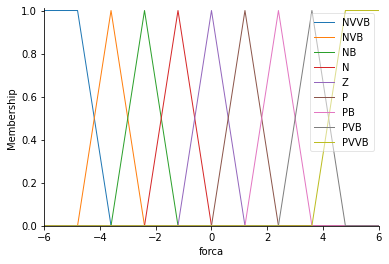

In [62]:
forca.view()

## 3.2. Funções para o balanço (SwingUp) do pêndulo





Seguindo as funções de pertencimento para o Theta e o Theta Dot temos:

<img src='https://drive.google.com/uc?id=1jS0ghq8Qd1L7GUgqDI53C970Fo9VbJDI'>

In [63]:
# Representação do pertencimento para a imagem da esquerda (ângulo - Theta)
swingUpTheta['NLS'] = fuzz.trimf(swingUpTheta.universe, [90,130,170])
swingUpTheta['NBS'] = fuzz.trimf(swingUpTheta.universe, [30,150,170])
swingUpTheta['SALN'] = fuzz.trimf(swingUpTheta.universe, [170,175,180])
swingUpTheta['Z'] = fuzz.trimf(swingUpTheta.universe, [180,180,180])
swingUpTheta['SALP'] = fuzz.trimf(swingUpTheta.universe, [180,185,190])
swingUpTheta['PBS'] = fuzz.trimf(swingUpTheta.universe, [190,210,330])
swingUpTheta['PLS'] = fuzz.trimf(swingUpTheta.universe, [190,230,270])

# Representação do pertecimento para a imagem da direita 
# (velocidade angular - Theta Dot)
swingUpThetaDot['NEG'] = fuzz.trapmf(swingUpThetaDot.universe, [-10,-10,-1,0])
swingUpThetaDot['ZS'] = fuzz.trapmf(swingUpThetaDot.universe, [-0.1,-0.05,0.05,0.1])
swingUpThetaDot['POS'] = fuzz.trapmf(swingUpThetaDot.universe, [0,1,10,10])

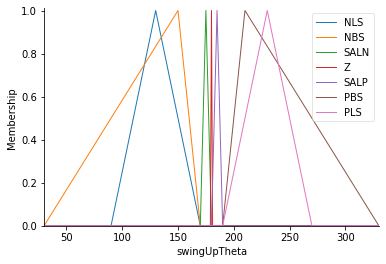

In [64]:
swingUpTheta.view()

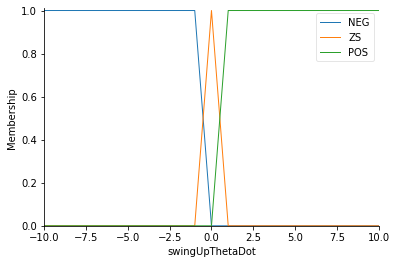

In [65]:
swingUpThetaDot.view()

## 3.3. Funções para o posicionamento do carrinho



Os gráficos a seguir mostram a função de pertencimento das variáveis cartPos e cartVel respectivamente: 

<img src='https://drive.google.com/uc?id=1M2gWt_F_Q_BzzVzm7kpqqNQBsf4nOzlk'>

In [66]:
# Representação do pertencimento da imagem a esquerda
cartPos['NBIG'] = fuzz.trapmf(cartPos.universe, [-0.4,-0.4, -0.3,-0.15])
cartPos['NEG'] = fuzz.trimf(cartPos.universe, [-0.3,-0.15,0])
cartPos['Z'] = fuzz.trimf(cartPos.universe, [-0.15,0,0.15])
cartPos['POS'] = fuzz.trimf(cartPos.universe, [0,0.15,0.3])
cartPos['PBIG'] = fuzz.trapmf(cartPos.universe, [0.15,0.3, 0.4,0.4])

# Representação do pertencimento da imagem a direita
cartVel['NEG'] = fuzz.trapmf(cartVel.universe, [-1,-1,-0.1,0])
cartVel['Z'] = fuzz.trimf(cartVel.universe, [-0.1,0,0.1])
cartVel['POS'] = fuzz.trapmf(cartVel.universe, [0,0.1,1,1])


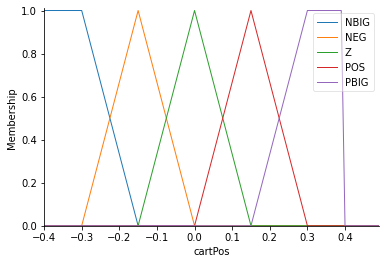

In [67]:
cartPos.view()

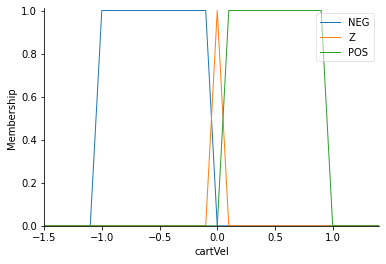

In [68]:
cartVel.view()

## 3.4. Funções para a estabilização do pêndulo e do carrinho


Os gráficos abaixo mostram a função de pertencimento para as variaveis pendAng e pendVel:
<img src='https://drive.google.com/uc?id=13HJwjN6iNRM5KEZzur3wnr6UUU5rub7K'>

In [69]:
# Representação do pertencimento da imagem a esquerda
pendAng['NVB'] = fuzz.trapmf(pendAng.universe, [-30,-30,-18,-12])
pendAng['NB'] = fuzz.trimf(pendAng.universe, [-16.5,-10.5,-4.5])
pendAng['N'] = fuzz.trimf(pendAng.universe, [-9,-4.5,0])
pendAng['ZO'] = fuzz.trapmf(pendAng.universe, [-3,-1,1,3])
pendAng['P'] = fuzz.trimf(pendAng.universe, [0,4.5,9])
pendAng['PB'] = fuzz.trimf(pendAng.universe, [4.5,10.5,16.5])
pendAng['PVB'] = fuzz.trapmf(pendAng.universe, [12,18,30,30])

# Representacao do pertencimento da imagem a direita
pendVel['NB'] = fuzz.trapmf(pendVel.universe, [-6,-6,-4.2,-1.7])
pendVel['N'] = fuzz.trimf(pendVel.universe, [-4.1,-1.7,0])
pendVel['ZO'] = fuzz.trapmf(pendVel.universe, [-1.7,-0.1,0.1,1.7])
pendVel['P'] = fuzz.trimf(pendVel.universe, [0,1.7,3.6])
pendVel['PB'] = fuzz.trapmf(pendVel.universe, [1.7,4.2,6,6])


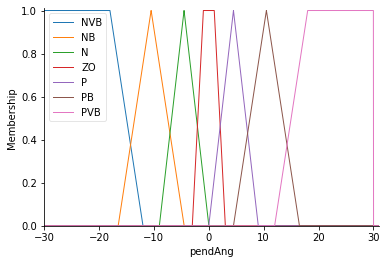

In [70]:
pendAng.view()

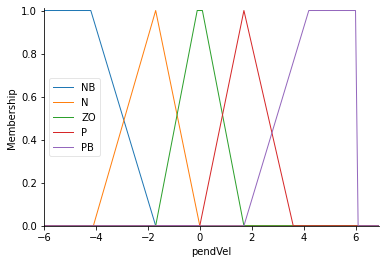

In [71]:
pendVel.view()

# 4. Aplicação das regras


## 4.1. Regras para balanço (SwingUp) do pêndulo

A partir da tabela abaixo, são definidas as regras para o balanço do pêndulo.

<img src='https://drive.google.com/uc?id=1N_TW0N2-oDcG2JAtlYUMRZcIka18NyCy'>

In [72]:
swingRule1 = ctrl.Rule(swingUpThetaDot['NEG'] & swingUpTheta['SALP'], forca['P'])
swingRule2 = ctrl.Rule(swingUpThetaDot['NEG'] & swingUpTheta['PBS'], forca['Z'])
swingRule3 = ctrl.Rule(swingUpThetaDot['NEG'] & swingUpTheta['PLS'], forca['PB'])
swingRule4 = ctrl.Rule(swingUpThetaDot['ZS'] & swingUpTheta['Z'], forca['P'])
swingRule5 = ctrl.Rule(swingUpThetaDot['POS'] & swingUpTheta['NLS'], forca['NB'])
swingRule6 = ctrl.Rule(swingUpThetaDot['POS'] & swingUpTheta['NBS'], forca['Z'])
swingRule7 = ctrl.Rule(swingUpThetaDot['POS'] & swingUpTheta['SALN'], forca['N'])

## 4.2. Regras para controle da posição do carrinho



Com base na tabela abaixo, as regras para o posicionamento do carrinho levando em consideração a posição e velocidade serão definidas: 

<img src='https://drive.google.com/uc?id=17Z28sbx6EQFA0VztUfdANUql2l-KYH22'>

In [74]:
cartRule1 = ctrl.Rule(cartVel['NEG'] & cartPos['NBIG'], forca['PVVB'])
cartRule2 = ctrl.Rule(cartVel['NEG'] & cartPos['NEG'], forca['PVB'])
cartRule3 = ctrl.Rule(cartVel['NEG'] & cartPos['Z'], forca['PB'])
cartRule4 = ctrl.Rule(cartVel['Z'] & cartPos['Z'], forca['Z'])
cartRule5 = ctrl.Rule(cartVel['POS'] & cartPos['Z'], forca['NB'])
cartRule6 = ctrl.Rule(cartVel['POS'] & cartPos['POS'], forca['NVB'])
cartRule7 = ctrl.Rule(cartVel['POS'] & cartPos['PBIG'], forca['NVVB'])

## 4.3. Regras para a estabilização do pêndulo



A tabela abaixo apresenta as regras de estabilização do pêndulo:
<img src='https://drive.google.com/uc?id=164Z6h28cd0mm9jHEJMRmdq7wiDPaianC'>

In [ ]:
estRule1 = ctrl.Rule(pendVel['NB'] & pendAng['NVB'], forca['NVVB'])
estRule2 = ctrl.Rule(pendVel['NB'] & pendAng['NB'], forca['NVVB'])
estRule3 = ctrl.Rule(pendVel['NB'] & pendAng['N'], forca['NVB'])
estRule4 = ctrl.Rule(pendVel['NB'] & pendAng['ZO'], forca['NB'])
estRule5 = ctrl.Rule(pendVel['NB'] & pendAng['P'], forca['N'])
estRule6 = ctrl.Rule(pendVel['NB'] & pendAng['PB'], forca['Z'])
estRule7 = ctrl.Rule(pendVel['NB'] & pendAng['PVB'], forca['P'])

estRule8  = ctrl.Rule(pendVel['N'] & pendAng['NVB'], forca['NVVB'])
estRule9  = ctrl.Rule(pendVel['N'] & pendAng['NB'], forca['NVB'])
estRule10 = ctrl.Rule(pendVel['N'] & pendAng['N'], forca['NB'])
estRule11 = ctrl.Rule(pendVel['N'] & pendAng['ZO'], forca['N'])
estRule12 = ctrl.Rule(pendVel['N'] & pendAng['P'], forca['Z'])
estRule13 = ctrl.Rule(pendVel['N'] & pendAng['PB'], forca['P'])
estRule14 = ctrl.Rule(pendVel['N'] & pendAng['PVB'], forca['PB'])

estRule15 = ctrl.Rule(pendVel['ZO'] & pendAng['NVB'], forca['NVB'])
estRule16 = ctrl.Rule(pendVel['ZO'] & pendAng['NB'], forca['NB'])
estRule17 = ctrl.Rule(pendVel['ZO'] & pendAng['N'], forca['N'])
estRule18 = ctrl.Rule(pendVel['ZO'] & pendAng['ZO'], forca['Z'])
estRule19 = ctrl.Rule(pendVel['ZO'] & pendAng['P'], forca['P'])
estRule20 = ctrl.Rule(pendVel['ZO'] & pendAng['PB'], forca['PB'])
estRule21 = ctrl.Rule(pendVel['ZO'] & pendAng['PVB'], forca['PVB'])

estRule22 = ctrl.Rule(pendVel['P'] & pendAng['NVB'], forca['NB'])
estRule23 = ctrl.Rule(pendVel['P'] & pendAng['NB'], forca['N'])
estRule24 = ctrl.Rule(pendVel['P'] & pendAng['N'], forca['Z'])
estRule25 = ctrl.Rule(pendVel['P'] & pendAng['ZO'], forca['P'])
estRule26 = ctrl.Rule(pendVel['P'] & pendAng['P'], forca['PB'])
estRule27 = ctrl.Rule(pendVel['P'] & pendAng['PB'], forca['PVB'])
estRule28 = ctrl.Rule(pendVel['P'] & pendAng['PVB'], forca['PVVB'])

estRule29 = ctrl.Rule(pendVel['PB'] & pendAng['NVB'], forca['N'])
estRule30 = ctrl.Rule(pendVel['PB'] & pendAng['NB'], forca['Z'])
estRule31 = ctrl.Rule(pendVel['PB'] & pendAng['N'], forca['P'])
estRule32 = ctrl.Rule(pendVel['PB'] & pendAng['ZO'], forca['PB'])
estRule33 = ctrl.Rule(pendVel['PB'] & pendAng['P'], forca['PVB'])
estRule34 = ctrl.Rule(pendVel['PB'] & pendAng['PB'], forca['PVVB'])
estRule35 = ctrl.Rule(pendVel['PB'] & pendAng['PVB'], forca['PVVB'])